In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_theme()  # sets seaborn's theme for matplotlib automatically


### Observations from Data Info
- Dataset contains 150+ rows and 19 columns.
- No missing values detected in the provided data.

In [ ]:
# Load the dataset
df = pd.read_csv('C:\\Users\\ssaur\\OneDrive\\Desktop\\aluminum-wire-rod\\data\\INT254_dataset_Final.csv')

# Display basic info
print("Dataset Shape:", df.shape)
print("\nColumn Names:", df.columns.tolist())
print("\nMissing Values:\n", df.isnull().sum())
print("\nData Types:\n", df.dtypes)

In [ ]:
# Summary statistics
print("Summary Statistics:")
display(df.describe())

### Observations from Histograms
- Tensile Strength: Multi-modal distribution, peaks around 400-500 MPa.
- Elongation: Right-skewed, most values between 20-40%.

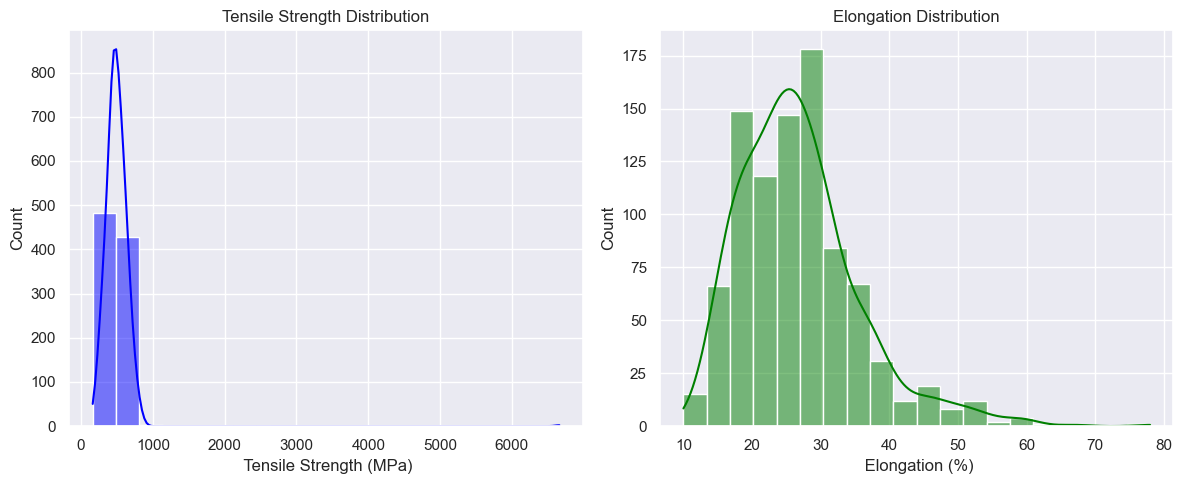

In [10]:
# Plot histograms for Tensile Strength and Elongation
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df[' Tensile Strength (MPa)'], bins=20, kde=True, color='blue')
plt.title('Tensile Strength Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df[' Elongation (%)'], bins=20, kde=True, color='green')
plt.title('Elongation Distribution')

plt.tight_layout()
plt.show()

### Observations from Correlation
- Temperature (°C) has a strong negative correlation with Tensile Strength.
- Elongation increases with higher temperatures.

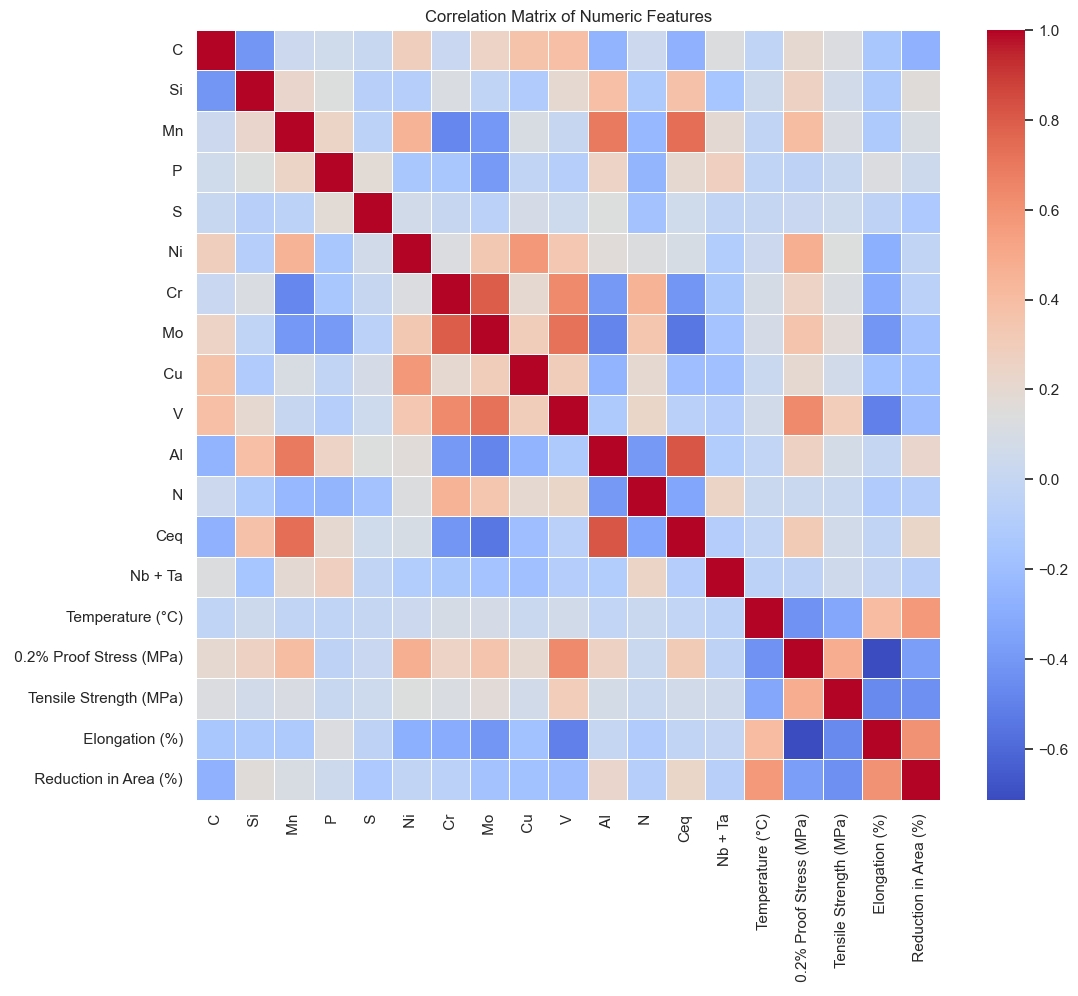

Correlation with Tensile Strength:


 Tensile Strength (MPa)     1.000000
 0.2% Proof Stress (MPa)    0.480379
V                           0.300307
 Mo                         0.172995
 Ni                         0.141140
 C                          0.123722
 Cr                         0.122122
 Mn                         0.115703
 Al                         0.077277
 Cu                         0.066212
 Si                         0.066060
Ceq                         0.065333
Nb + Ta                     0.051117
 S                          0.049277
 N                          0.028585
 P                          0.014310
 Temperature (°C)          -0.328002
 Reduction in Area (%)     -0.437164
 Elongation (%)            -0.459274
Name:  Tensile Strength (MPa), dtype: float64


Correlation with Elongation:


 Elongation (%)             1.000000
 Reduction in Area (%)      0.604215
 Temperature (°C)           0.407870
 P                          0.127121
 Al                         0.001293
Nb + Ta                    -0.008397
Ceq                        -0.019481
 S                         -0.042973
 N                         -0.106271
 Mn                        -0.123131
 Si                        -0.124037
 C                         -0.148794
 Cu                        -0.178647
 Ni                        -0.291701
 Cr                        -0.303170
 Mo                        -0.411885
 Tensile Strength (MPa)    -0.459274
V                          -0.501546
 0.2% Proof Stress (MPa)   -0.713544
Name:  Elongation (%), dtype: float64

In [12]:
# Select numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df[numeric_cols].corr(), annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

# Focus on correlations with target variables
print("Correlation with Tensile Strength:")
display(df[numeric_cols].corr()[' Tensile Strength (MPa)'].sort_values(ascending=False))
print("\nCorrelation with Elongation:")
display(df[numeric_cols].corr()[' Elongation (%)'].sort_values(ascending=False))

### Observations from Scatter Plots
- Clear trend: Tensile Strength decreases as temperature rises.
- Elongation increases with temperature, with variability across alloys.

In [ ]:
# Scatter plot: Temperature vs Tensile Strength
plt.figure(figsize=(8, 6))
sns.scatterplot(x=' Temperature (°C)', y=' Tensile Strength (MPa)', hue='Alloy code', data=df)
plt.title('Temperature vs Tensile Strength by Alloy')
plt.show()

# Scatter plot: Temperature vs Elongation
plt.figure(figsize=(10, 6))
sns.scatterplot(x=' Temperature (°C)', y=' Elongation (%)', hue='Alloy code', data=df)
plt.title('Temperature vs Elongation by Alloy')
plt.show()

In [19]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('C:/Users/ssaur/OneDrive/Desktop/aluminum-wire-rod-ml/data/INT254_dataset_Final.csv')

# Display basic info to confirm loading
print("Dataset Shape:", df.shape)
print("\nColumn Names:", df.columns.tolist())
print("\nFirst 5 rows:\n", df.head())

Dataset Shape: (915, 20)

Column Names: ['Alloy code', ' C', ' Si', ' Mn', ' P', ' S', ' Ni', ' Cr', ' Mo', ' Cu', 'V', ' Al', ' N', 'Ceq', 'Nb + Ta', ' Temperature (°C)', ' 0.2% Proof Stress (MPa)', ' Tensile Strength (MPa)', ' Elongation (%)', ' Reduction in Area (%)']

First 5 rows:
   Alloy code     C    Si    Mn      P      S     Ni    Cr    Mo    Cu    V  \
0        MBB  0.12  0.36  0.52  0.009  0.003  0.089  0.97  0.61  0.04  0.0   
1        MBB  0.12  0.36  0.52  0.009  0.003  0.089  0.97  0.61  0.04  0.0   
2        MBB  0.12  0.36  0.52  0.009  0.003  0.089  0.97  0.61  0.04  0.0   
3        MBB  0.12  0.36  0.52  0.009  0.003  0.089  0.97  0.61  0.04  0.0   
4        MBB  0.12  0.36  0.52  0.009  0.003  0.089  0.97  0.61  0.04  0.0   

      Al       N  Ceq  Nb + Ta   Temperature (°C)   0.2% Proof Stress (MPa)  \
0  0.003  0.0066  0.0      0.0                 27                       342   
1  0.003  0.0066  0.0      0.0                100                       338   
2  0.0